# **Task-3 :To Explore Unsupervised Machine Learning**
##**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

 **IMPORTING IMPORTANT LIBRARIES**

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
%matplotlib inline

**LOADING PRE_INSTALLED DATASET IN KERAS**

In [39]:
iris = datasets.load_iris()

**DEFINING OUR DATA AND TARGET**

In [40]:
X = iris.data
y = iris.target

**VISUALIZING THE DIFFERENT CLUSTERS USING SCATTER PLOT**

Text(0, 0.5, 'Sepal Width')

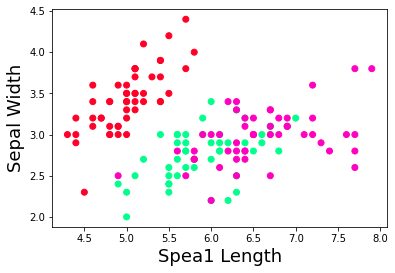

In [41]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

**GETTING NUMBER OF CLUSTERS USING ELBOW METHOD**

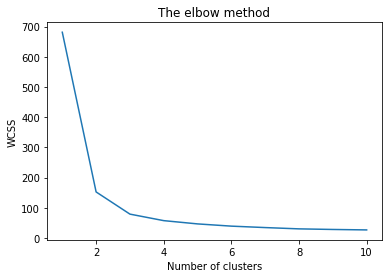

In [42]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**BUILDIND BASELINE MODEL**

In [44]:
km1 = KMeans(n_clusters = 3)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**GETTING POSITION OF CENTROIDS**

In [45]:
centers1 = km1.cluster_centers_
print(centers1)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


**PLOTTING THE ACTUAL AND PREDICTED DATA**

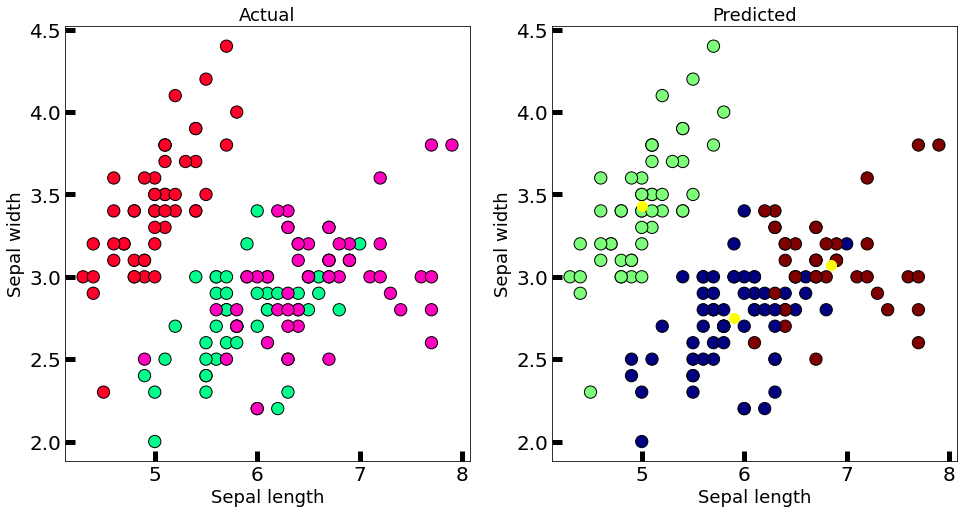

In [46]:
new_labels = km1.labels_# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

**GAUSSIAN MIXTURE MODEL**

Text(0.5, 0.92, 'Gaussian Mixture Model')

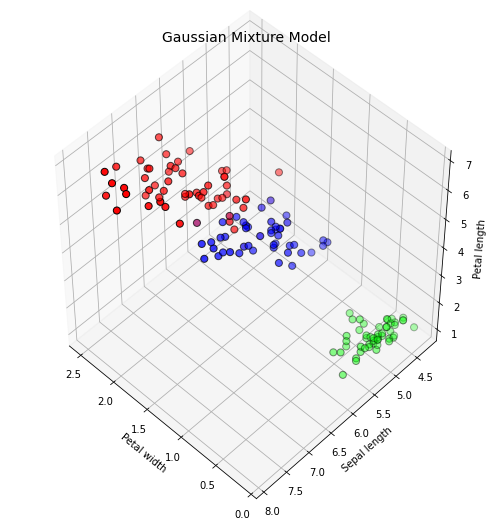

In [47]:
#Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
proba_lists = gmm.predict_proba(X)#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Model", fontsize=14)

#**THANK YOU!!**